<a href="https://colab.research.google.com/github/thaskani/ML-exercises/blob/main/DatasetAnalysisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Important dependies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import set_config
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pd.pandas.set_option('display.max_columns',None)


# 1. Exploratory Data Analysis:

In [ ]:
# Load data from CSV file
dataset_org = pd.read_csv('testVer1.csv')
dataset = dataset_org

In [ ]:
dataset.head(10)

,Target,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  5960 non-null   int64  
 1   var1    5960 non-null   int64  
 2   var2    5442 non-null   float64
 3   var3    5848 non-null   float64
 4   var4    5708 non-null   object 
 5   var5    5681 non-null   object 
 6   var6    5445 non-null   float64
 7   var7    5252 non-null   float64
 8   var8    5380 non-null   float64
 9   var9    5652 non-null   float64
 10  var10   5450 non-null   float64
 11  var11   5738 non-null   float64
 12  var12   4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
# Split data into input and ouput variables (independent and dependent variabels)
X = dataset.drop("Target", axis=1)
y = dataset['Target']

In [ ]:
# Distribution of 0's and 1's in the output/'Target'

y.value_counts()

0    4771
1    1189
Name: Target, dtype: int64

/Users/saisathishkethu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

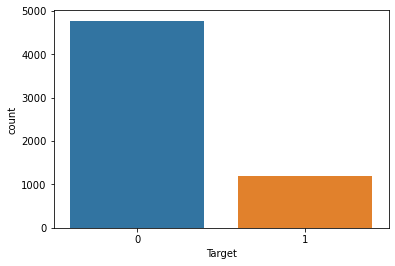

In [ ]:
sns.countplot(y)

#### Above Target value distribution shows that this dataset is imbalanced!

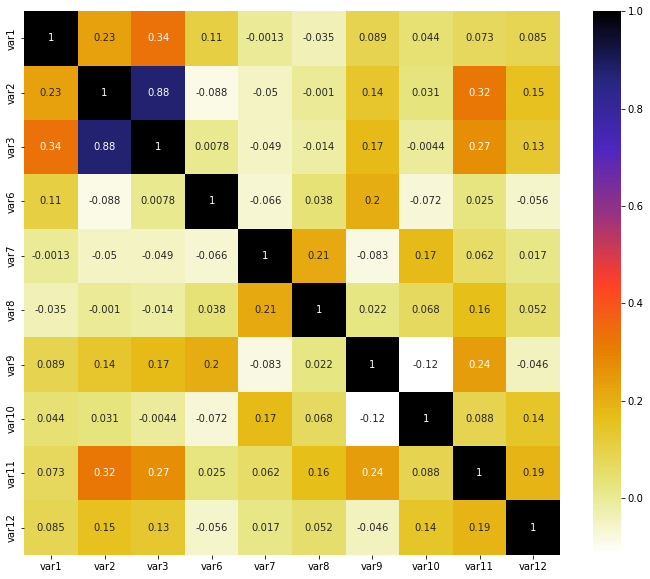

In [ ]:
# analysis data for correlation
# using pearson correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

####  from about correlation heatMap, two independent (var3,var2) features are highly correlated!

In [ ]:
# Function to select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X,0.7)
corr_features

{'var3'}

## Missing values

In [ ]:
# check the percentage of nan values present in each feature

# 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

# 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

var2 0.0869  % missing values
var3 0.0188  % missing values
var4 0.0423  % missing values
var5 0.0468  % missing values
var6 0.0864  % missing values
var7 0.1188  % missing values
var8 0.0973  % missing values
var9 0.0517  % missing values
var10 0.0856  % missing values
var11 0.0372  % missing values
var12 0.2126  % missing values


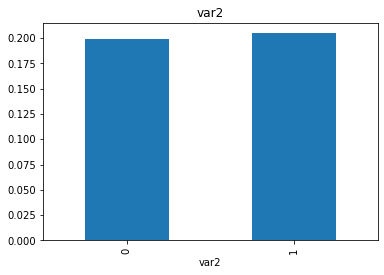

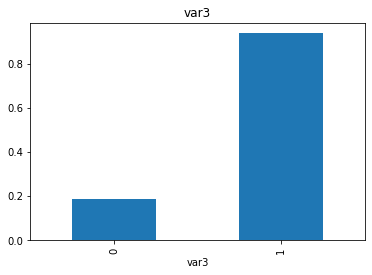

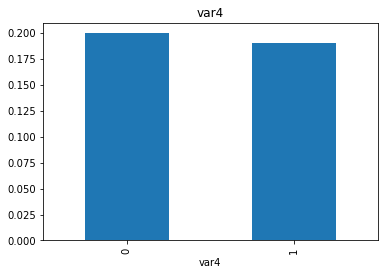

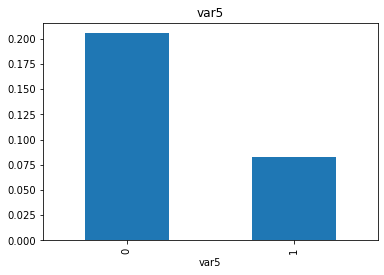

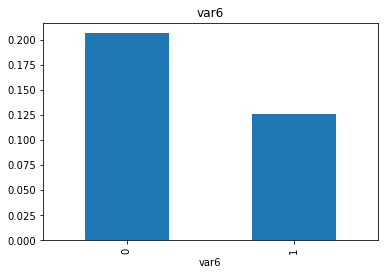

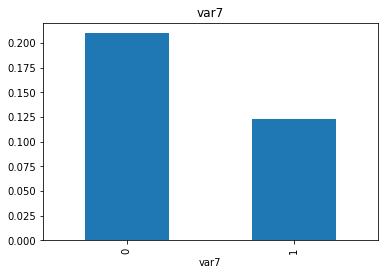

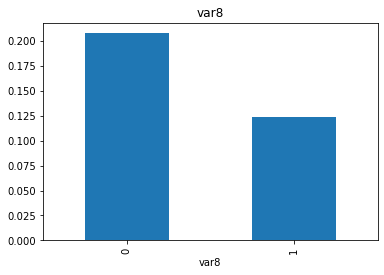

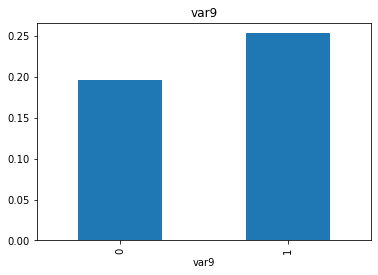

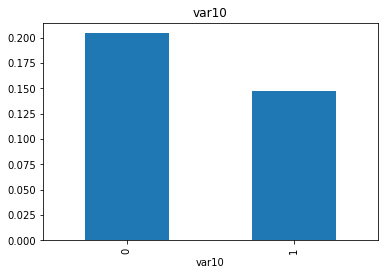

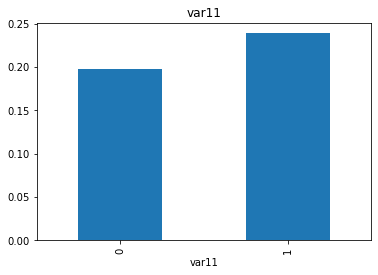

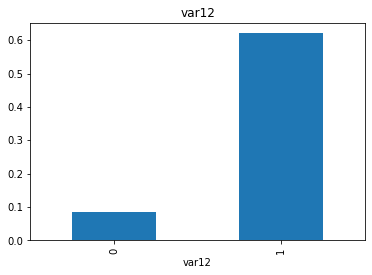

In [ ]:
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean Traget where the information is missing or present
    data.groupby(feature)['Target'].mean().plot.bar()
    plt.title(feature)
    plt.show()

#### Above graphs shows missing values have impact on the dependent variable ("Target")

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in X.columns if X[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

numerical_features

Number of numerical variables:  10


['var1',
 'var2',
 'var3',
 'var6',
 'var7',
 'var8',
 'var9',
 'var10',
 'var11',
 'var12']

In [ ]:
# List of discrete features
discrete_feature=[feature for feature in numerical_features if len(X[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [ ]:
discrete_feature

['var7', 'var8', 'var10']

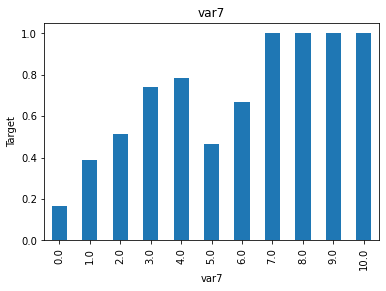

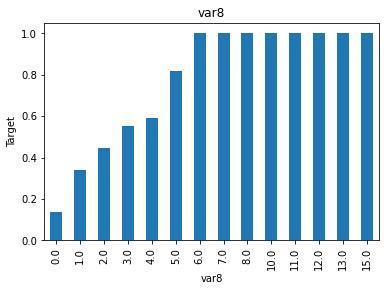

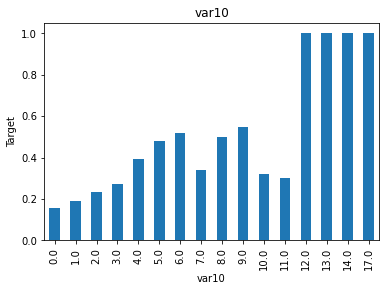

In [ ]:
## the realtionship between discrete fetures them and Target

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Target'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plt.show()

In [ ]:
## Continuous features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
# print("Continuous feature Count {}".format(len(continuous_feature)))

continuous_feature

['var1', 'var2', 'var3', 'var6', 'var9', 'var11', 'var12']

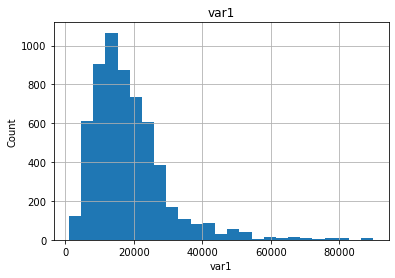

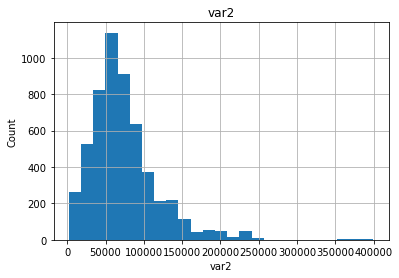

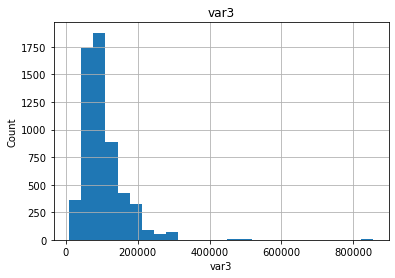

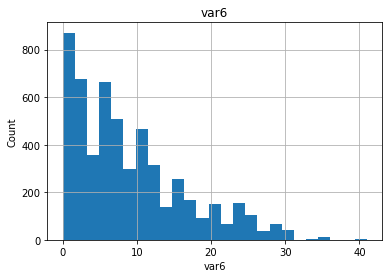

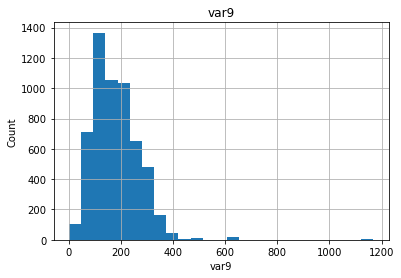

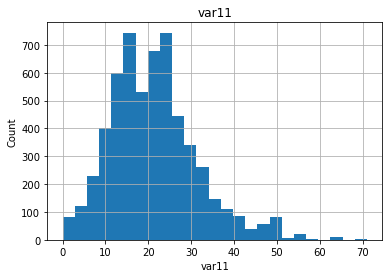

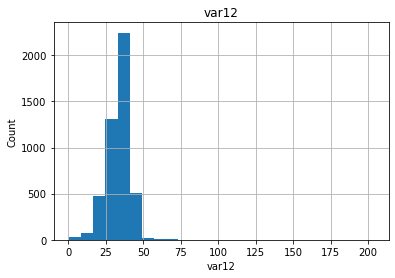

In [ ]:
## analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Above graphs shows discrete features are skewed!

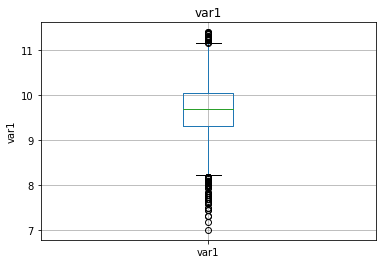

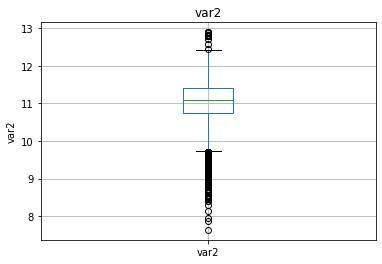

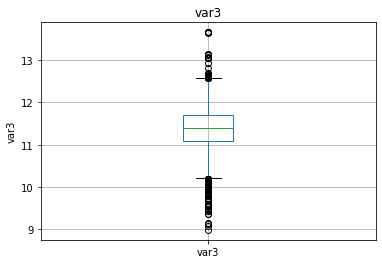

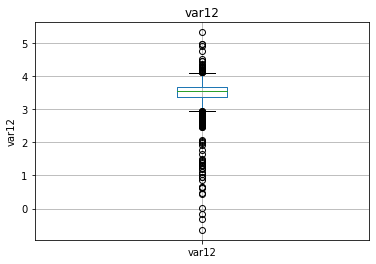

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


#### above graphs show that there are outliers in the data!

In [ ]:
## Categorical Features
categorical_features=[feature for feature in X.columns if X[feature].dtypes=='O']
categorical_features

['var4', 'var5']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is var4 and number of categories are 3
The feature is var5 and number of categories are 7


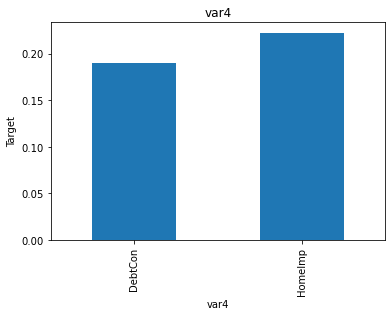

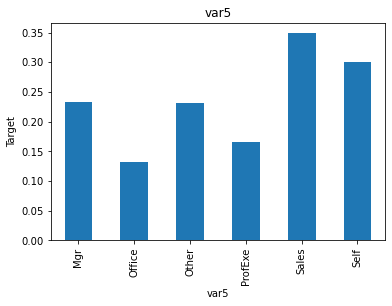

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Target'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plt.show()

# 2. Feature engineering and Model Building

In [ ]:
# split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
## Pipelineing
numeric_discrete_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", StandardScaler()),
    ]
)


In [ ]:
set_config(display='diagram')

In [ ]:
numeric_discrete_preprocessor

Pipeline(steps=[('imputation_mean', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:
def log_transform(x):
    return np.log(1+x)

In [ ]:

transformer = FunctionTransformer(log_transform)

In [ ]:
numeric_continous_preprocessor = Pipeline(
    steps=[
        ('transformer', transformer),
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", StandardScaler()),
        ])


In [ ]:
numeric_continous_preprocessor

Pipeline(steps=[('transformer',
                 FunctionTransformer(func=<function log_transform at 0x7fbebae90790>)),
                ('imputation_mean', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:

categorical_processor=Pipeline(
    steps=[("imputation_constant",SimpleImputer(fill_value="missing",strategy="constant")),
          ("onehot",OneHotEncoder(handle_unknown="ignore"))]

)

In [ ]:
categorical_processor

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Combine processing techniques
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,categorical_features),
    ("numerical_discrete",numeric_discrete_preprocessor,discrete_feature),
    ("numerical_continous",numeric_continous_preprocessor,continuous_feature),
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['var4', 'var5']),
                                ('numerical_discrete',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['var7', 'var8', 'var10']),
                                ('numerical_continous',
                                 Pipeline(steps=[('transformer',
                                                  FunctionTransformer(func=<function log_transform at 0x7fbebae90790>)),
                                                 ('imputation_mean',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['var1', 'var2', 'var3', 'var6', 'var9',
                                  'var11', 'var12'])])

In [ ]:
# pipe = make_pipeline(preprocessor,LogisticRegression(random_state=0))

In [ ]:
# pipe.fit(X_train,y_train)

In [ ]:
# pipe.score(X_test,y_test)

# Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [ ]:
# Create a pipeline


pipe = Pipeline(steps=[("preprocessor",preprocessor),
                       ("sampling", SMOTE()),
                       ("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters

grid_param = [
                {
                    "classifier": [LogisticRegression(solver='liblinear',multi_class='auto')],
                     "classifier__C": [1,10,20,30]
                 },
                {
                    "classifier": [RandomForestClassifier()],
                     "classifier__n_estimators": [1,10,50]
                },
                {
                    "classifier": [AdaBoostClassifier()],
                     "classifier__n_estimators": range(1,50,5)
                },
                {
                    "classifier":[ KNeighborsClassifier()],
                    "classifier__n_neighbors":range(1,50,5)
                },
                {
                    "classifier":[SVC(gamma='auto')],
                    "classifier__C": [1,10,20,40,50],
                    "classifier__kernel": ['rbf','poly','linear']
                }
            ]

In [ ]:
score = []
best_score = 0
for param in grid_param:
    gridsearch = GridSearchCV(pipe,param, cv=5, scoring='f1', verbose=0,n_jobs=-1) # Fit grid search
    model = gridsearch.fit(X_train,y_train)
    score.append({

                    "model_params":model.best_params_,
                    "score": model.best_score_
                 }

    )
    if model.best_score_ > best_score:
        final_model = model
        best_score = model.best_score_


In [ ]:
final_model.best_params_['classifier']

KNeighborsClassifier(n_neighbors=1)

In [ ]:
print("Best f1_score is %.3f" %best_score)

Best f1_score is 0.835


In [ ]:
# best performing models for each algorithm with their accuracy
score

[{'model_params': {'classifier': LogisticRegression(C=20, solver='liblinear'),
   'classifier__C': 20},
  'score': 0.5336878494455112},
 {'model_params': {'classifier': RandomForestClassifier(n_estimators=50),
   'classifier__n_estimators': 50},
  'score': 0.7901270237091683},
 {'model_params': {'classifier': AdaBoostClassifier(n_estimators=36),
   'classifier__n_estimators': 36},
  'score': 0.6673005663765713},
 {'model_params': {'classifier': KNeighborsClassifier(n_neighbors=1),
   'classifier__n_neighbors': 1},
  'score': 0.8350860587909403},
 {'model_params': {'classifier': SVC(C=50, gamma='auto'),
   'classifier__C': 50,
   'classifier__kernel': 'rbf'},
  'score': 0.7014984691053152}]

In [ ]:
y_pred = final_model.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('confusion matrix:')
print(cm)

confusion matrix:
[[1436   74]
 [   8  270]]


Text(42.0, 0.5, 'Truth')

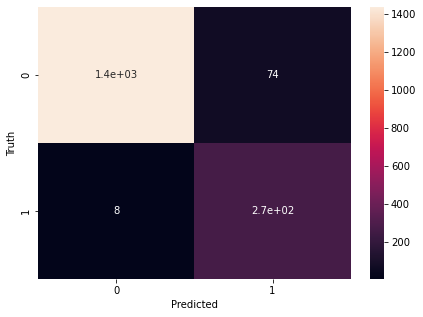

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')